In [3]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt 
import sklearn 
from sklearn.datasets import load_boston 
boston = load_boston() 
bos = pd.DataFrame(boston.data) 



In [6]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


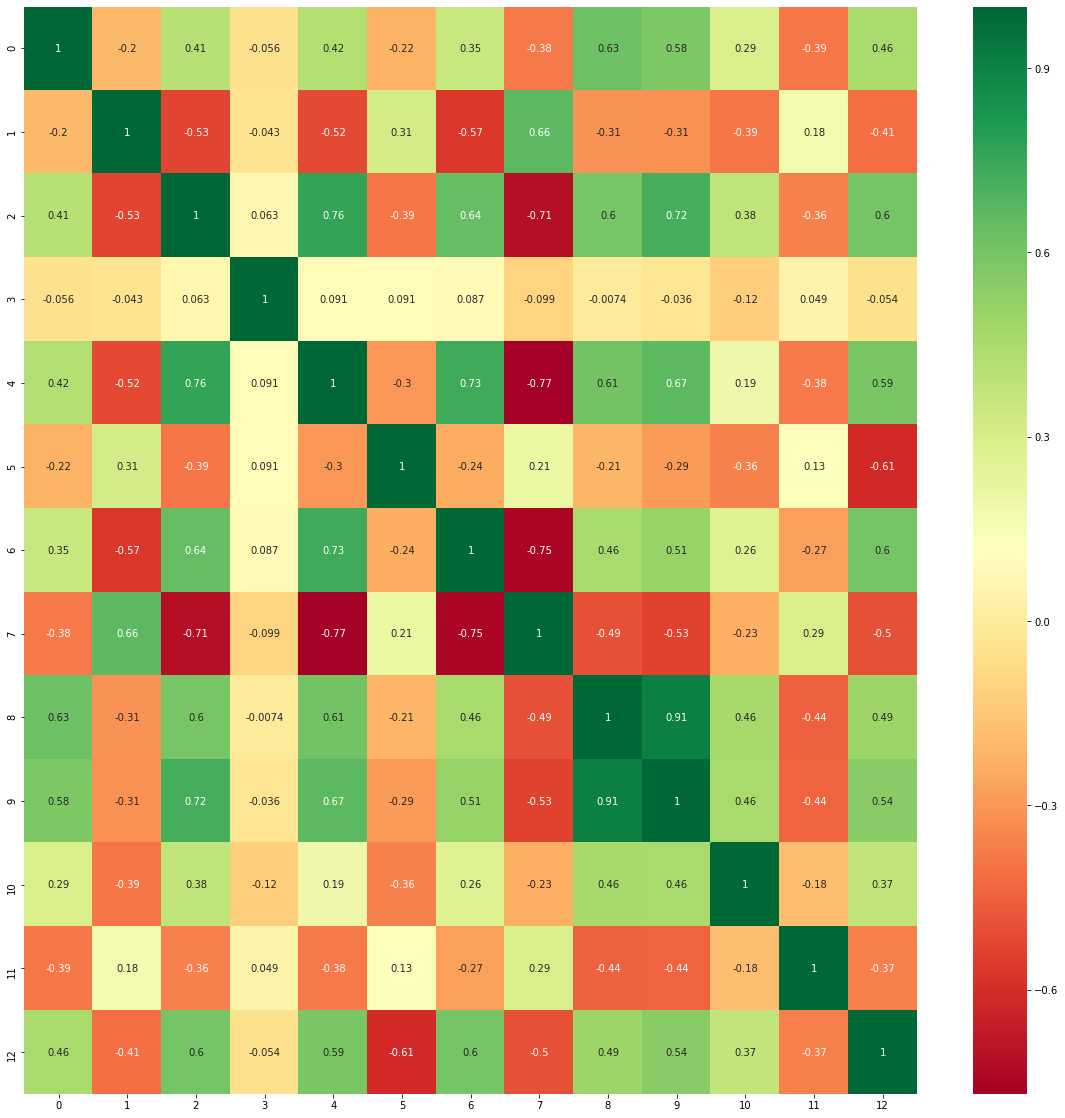

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
#corrmat=df.corr()
#correlation_features=corrmat.index()
plt.figure(figsize=(20,20))

h=sns.heatmap(bos.corr(),annot=True,cmap="RdYlGn")

In [9]:
bos.corr()

#The above pairplot in the form of correlation.

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [10]:
#Dependent feature:Price which is the last feature in our dataset

X=bos.iloc[:,:-1]#Independent feature
y=bos.iloc[:,-1]#Dependent feature

In [11]:
#Let us split out train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
#traning my model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
coeff=pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff

,Coefficient
0,0.134406
1,0.021146
2,0.104387
3,-0.772404
4,2.769948
5,-4.437051
6,0.090672
7,-0.053685
8,-0.007065
9,-0.001592


In [15]:
regressor.intercept_

31.4122637353119

In [16]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train,y_train)))

Coefficient of determination R^2 <-- on train set: 0.6772247705027308


# Interpretation:R^2 value for train data set is 67%.It should be more closer to one to say that the modelis a good fit

In [17]:
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test,y_test)))

Coefficient of determination R^2 <-- on test set: 0.6049368525428258


# R^2 value for test data set is 60%.It should be more closer to one to say that the model is a good fit.Howver we can see that their is no too much variance in the train and test rsquare value and their is no overfitting issue

In [18]:
#predicting test data
prediction=regressor.predict(X_test)

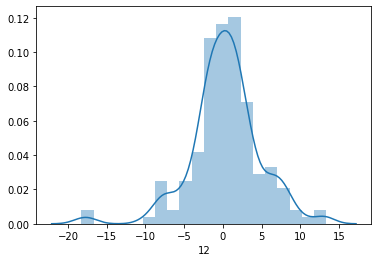

In [19]:
sns.distplot(y_test-prediction)

Interpretation:The graph is not close to a guassian distribution curve.It looks close to like a bell curve but not completely.

Residuals

Explore the residuals to make sure everything was okay with our data.

Since it is not almost normally distributed we can say that it is not a good model.

In [20]:
#regression evaluation metrics
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 3.25329525646645
MSE: 20.82433637184951
RMSE: 4.563368971697282


Lower values of RMSE indicate better fit